# Mathematics in Finance

## Jan Janoušek

### Problem 1

Our task in this problem is to make a programme that will calculate $NPV$ (Net Present Value) and $IRR$ (Internal Rate of Return).
Input consists of two parts. Rate which is flow type and represents yearly-interest (p.a.) (we are assuming that it is constant throughout the years we are counting for).
Second part of the input is a vector of integers which represents yearly cashflow. Intial investion (=Year 0) is (expected to be) negative.
Outputs are both float types.

$NPV$ is calculated pretty easily: $NPV=\sum_{y=0}^n \frac{C_y}{(1+r)^y}$, where $y$ stands as a counter through years, $n$ is the number of years we are calculating $NPV$ for. $C_y$ stands for cashflow in year $y$ and $r$ stands for interest rate. $NPV$ represents exactly what the name stands for. 

$IRR$ is calculated from following formula: $0=\sum_{y=0}^n \frac{C_y}{(1+IRR)^y}$,where $y$ stands as a counter through years, $n$ is the number of years we are calculating $IRR$ for. $C_y$ stands for cashflow in year $y$. $IRR$ can be interpreted as maximal rate of inflation at which our investition breaks even.

In [93]:
import numpy as np
rate=input('Please state your rate : ')
rate=float(rate.replace(",", ".")) #after many fails while trying to test the programme, I got annoyed by the fail so I inveted this helper    
input_string = input("Please stat your yearly cashflows since Year 0 separated by space: ")
cashflows = [int(x) for x in input_string.split()]

def my_npv(rate, cashflows):
    npv_value=0
    #npv_value = [npv_value+cashflows[x]/(1+rate)**x for x in range(len(cashflows))]#??? Funguje to? Pokud jo tak dalsi tri radky jsou useless
    #counting_list = [x for x in range(len(cashflows))]
    for i in range(len(cashflows)):
        npv_value=npv_value+cashflows[i]/(1+rate)**i
    print(npv_value)
    return npv_value

def my_irr(cashflows):
    all_roots=np.roots(cashflows)
    positive_real = [x for x in all_roots if np.isreal(x) if x>0]
    irr_value=float(positive_real[0]-1)
    return irr_value

npv=my_npv(rate, cashflows)
irr=my_irr(cashflows)
print(npv)
print(irr)





Please state your rate : 0.281
Please stat your yearly cashflows since Year 0 separated by space: -100 100 1
-21.32658850515034
-21.32658850515034
0.009901951359278627


### Problem 2

In this problem we are assuming that log returns of the asset price are independent and identically normally $N(0,\sigma \sqrt{dt})$ distributed. We are fixing three parameters $\sigma$-volatility of the asset, $T$-sampling horizon and $n$ number of sampling points. We consider $dt=\frac{T}{n}$. Time in each graph is in days throughout 10 years.

#### Part (a)

Our task in this part is to write a procedure that simulates $n$ log increments with our Normal distribution and then to plot it on $[0,T]$ horizon.

#### Part (b)

Our task in this part is to take cumulative log returns and plot it in a separate graph.

#### Part (c)

Our task in this part is to calculate simmulated asset price by this formula: $S(t)=S(0)\exp \left( cmlogret(t)-\frac{1}{2}\sigma^2 t \right)$ and plot it on a separate graph.

#### Part (d)

Our task in this part is to generate 20 scenarios from part (c) and plot them all in a single graph.

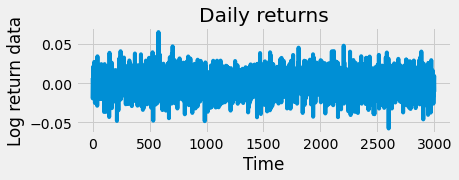

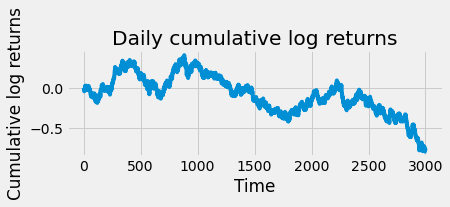

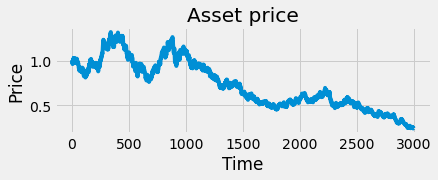

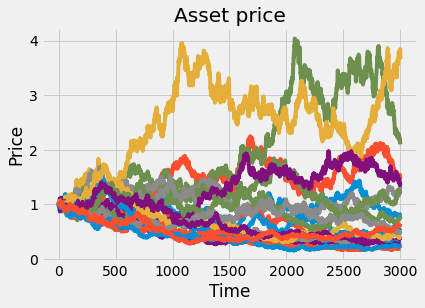

In [94]:
import numpy as np
from numpy.random import normal as normal_distribution
import matplotlib.pyplot as plt
#Change if you want to put your input instead of predetermined one.
if False:
    sigma=float(input("Please enter your suggested volatility. For example S&P500 volatility from 26th November 2020 at 10pm was 21.25: "))
    T=int(input("Please enter your suggested horizon in whole years: "))
else:
    sigma=0.25
    T=10
trading_days=300
n=T*trading_days
dt=1/trading_days

time=np.linspace(0,T+dt,n+1)

 

#Part(a)
logreturns=normal_distribution(0,sigma*np.sqrt(dt), n+1)
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.set_ylabel('Log return data')
ax1.set_xlabel('Time')
ax1.set_title('Daily returns')
line, = ax1.plot(logreturns)
plt.grid(True)
plt.show()    
    
#Part (b-1)
cmlogreturns = [sum(logreturns[0:x+1]) for x in range(n+1)]
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.set_ylabel('Cumulative log returns')
ax1.set_xlabel('Time')
ax1.set_title('Daily cumulative log returns')
line, = ax1.plot(cmlogreturns)
plt.grid(True)
plt.show()    

#Part (c)
S=np.zeros(n+1)
S[0]=1
S=S[0]*np.exp(cmlogreturns-1/2*sigma*sigma*2*time)
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.set_ylabel('Price')
ax1.set_xlabel('Time')
ax1.set_title('Asset price')
line, = ax1.plot(S)
plt.grid(True)
plt.show()    

#Part (d)
fix, ax1 = plt.subplots()
for i in range(20):
    logreturns=normal_distribution(0,sigma*np.sqrt(dt), n+1)
    cmlogreturns = [sum(logreturns[0:x+1]) for x in range(n+1)]
    S=np.zeros(n+1)
    S[0]=1
    S=S[0]*np.exp(cmlogreturns-1/2*sigma*sigma*2*time)
    ax1.plot(S)
plt.grid(True)
ax1.set_ylabel('Price')
ax1.set_xlabel('Time')
ax1.set_title('Asset price')
plt.show()

### Problem 3

Consider the following financial contract. The time horizon is T = 3 years and
there are n = 6 semiannual monitoring points. The contract has a face value 100.
The client receives 2.5% coupon when the monitoring price is above 80% of the
initial price of the underlying asset. This coupon is also received retroactively for all
monitoring points that were below 80% before any observed value above 80%. Thus
the number of 2.5% coupons received is in fact the index of the last observed value
above 80%. Moreover, if the price of the underlying security is above 100% at the
monitoring point, the contract is terminated (the coupons are paid). In addition,
if the price of the underlying asset is above 60% at the expiration time T = 3,
the client receives the face value 100 in full, otherwise she will receive the value
corresponding to the percentage of the final value of the underlying asset.

### Part (a)

Write the simulation procedure that computes the realized payoff for a single
asset evolution scenario.

### Part (b)

Generate sufficiently many scenarios that estimate the expected payoff of this
contract using the average payoff. Note the standard deviation of this result and
give 95% confidence interval of the expected payoff. Use some reasonable choices of
sigma (like 0.2 or 0.3). Try to find the value sigma for which the fair value of the
contract is at par.

Supposed that $X_1, \ldots, X_n$ is a random sample from normal distribution, then $\sqrt{n}\frac{\overline{X_n}-\mu}{\sqrt{S_n^2}}\sim t_{n-1}$ ($t_{n-1}$ stands for Student's distribution with n-1 degrees of freedom), therefore we get $P\left(-t_{n-1}(1-\alpha/2)\leq \sqrt{n}\frac{\overline{X_n}-\mu}{\sqrt{S_n^2}} \leq t_{n-1}(1-\alpha/2)\right)= 1-\alpha$, from which we get that $(1-\alpha)$ confidence interval for $\mu$ is:$\left( \overline{X_n}\mp t_{n-1}(1-\alpha/2) \sqrt{\frac{S_n^2}{n}} \right)$

### Part (c)

Plot the histogram of the payoff distribution for sigma 0.2 and 0.3

Your sigma:  0.3
Generated semiannual prices:  [90.1222145  87.37895339 83.72956236 80.9214085  55.88762672 71.08905233]
Your outcome:  110.0
95% confidence interval for is:  (98.25205178265817, 98.98210509572486)
The standart deviation of this result is:  11.638880541983095


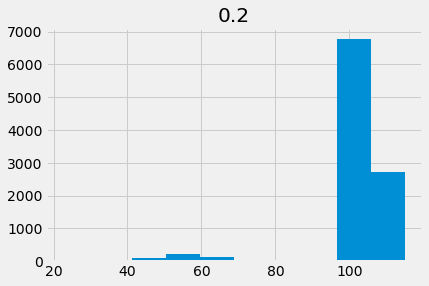

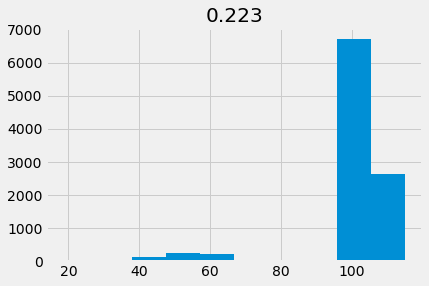

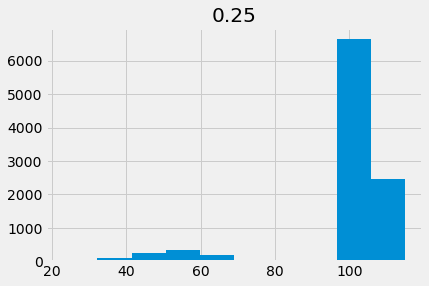

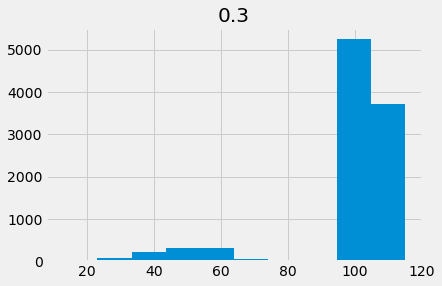

[None, None, None, None]

In [95]:
import numpy as np
import scipy
from numpy.random import normal as normal_distribution
import matplotlib.pyplot as plt
from scipy.stats import stats
#Part (a)
sigma=0.3
n=6
def find_first_above(border, data):
    for i in range(n):
        if data[i]>border:
            return i
    return -1

def find_last_above(border, data):
    for i in range(n-1, -1, -1):
        if data[i]>border:
            return i
    return -1

def data_generator(sigma):
    #generating asset price
    logreturns=normal_distribution(0,sigma*np.sqrt(0.5), n) 
    cmlogreturns = [sum(logreturns[0:x+1]) for x in range(n)]
    S=np.zeros(n)
    S[0]=100
    time=np.linspace(0,n+1,1)
    data=S[0]*np.exp(cmlogreturns-1/2*sigma*sigma*2*time)
    return data
    


def contract(data):
    #actual core of this part
    coupon=2.5
    a=find_first_above(100, data)
    if a>-1:
        return 100+coupon*(a+1)
    else:
        a=find_last_above(80, data)
        if data[n-1]>60:
            return 100+(a+1)*coupon
        else:
            return data[5]+(a+1)*coupon  
        
data=data_generator(sigma)
con=contract(data)
print('Your sigma: ', sigma)        
print('Generated semiannual prices: ', data)        
print('Your outcome: ',con)

#Part (b)
def confidence_interval(data, alpha):
    sd=np.std(data)
    mean=np.mean(data)
    n=len(data)
    T=scipy.stats.t(df=n).ppf(1-alpha/2)
    helper=T*sd/np.sqrt(n)
    return (mean-helper, mean+helper)
alpha=0.05
m=10000
data_2 = [contract(data_generator(sigma)) for x in range(m)]
interval=confidence_interval(data_2, alpha)
print("95% confidence interval for is: ",interval)
print("The standart deviation of this result is: ", np.std(data))


#Part (c)
sigmas=[0.2, 0.223, 0.25, 0.3]
def generate_and_plot_histo(sigma):
    data_2 = [contract(data_generator(sigma)) for x in range(m)]
    plt.hist(data_2)
    plt.title(sigma)
    plt.show()
    return
[generate_and_plot_histo(sigma) for sigma in sigmas]

In [ ]:
#Trying to find out fair sigma.
m=1000
sigmas=np.linspace(0.2,0.3,1001)
fair_sigmas=[]
[fair_sigmas.append(sigma) for sigma in sigmas if confidence_interval([contract(data_generator(sigma)) for x in range(m)],alpha)[1]>100>confidence_interval([contract(data_generator(sigma)) for x in range(m)],alpha)[0]]
#It is approximately about 0.223

### Problem 4

The goal of this problem is to find the optimal portfolio weights for 10 randomly
chosen assets from SP500.

In [96]:
import numpy as np
import pandas as pd
import pandas_datareader as dr
import time
np.random.seed(45613947)

table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers = table['Symbol'].tolist()
for i in range(len(tickers)):
    tickers[i] = tickers[i].replace(".","-")

mytickers = np.random.choice(tickers, 10, replace = False)
start_date = '2019-01-01'
start_date_plusone='2019-01-02 00:00:00'
end_date = time.strftime("%Y-%m-%d")
sp500 = dr.data.get_data_yahoo(mytickers, start_date, end_date)['Adj Close']

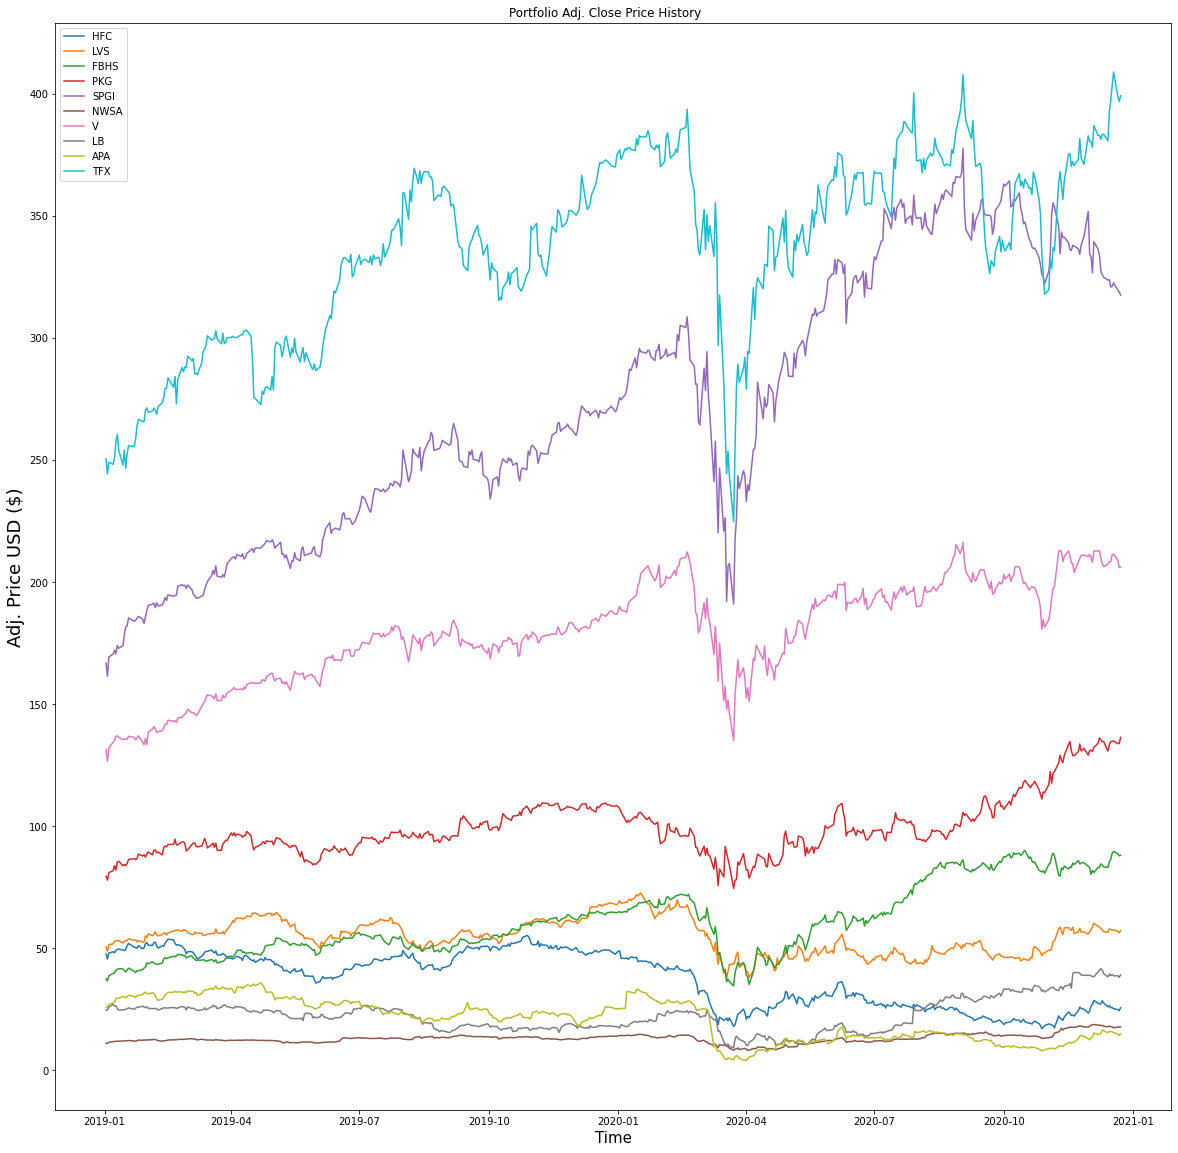

In [45]:
# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Adj. Close Price History    '
#Get the stocks
my_stocks = sp500
#Create and plot the graph
plt.figure(figsize=(20,20))
# Loop through each stock and plot the Adj Close for each day
for c in mytickers:
  plt.plot( my_stocks[c])#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [85]:
#Part (a)
names=[mytickers[x] for x in range(len(mytickers))]
date=sp500[names[0]].index[0]
print("The initial date is set to 2019-01-02 00:00:00 because of +/-1 problems, which we can neglect.")
print([a for a in mytickers if sp500[a].index[0]!=date])
print("We can see that every component was added to the index before 2019-01-01")


log_returns =sp500.pct_change().apply(lambda x: np.log(1+x))
expect=log_returns.mean().to_numpy()
sigma =log_returns.cov().to_numpy()
cov= log_returns.cov()
corr=log_returns.corr()

E = log_returns.mean().to_numpy()
scatter_x=[sigma[i][i] for i in range(10)]
scatter_y=E
expected_return = log_returns.mean()

if (np.all(np.linalg.eigvals(cov) > 0)):
    print("The covariance matrix is positive definite.")
else:
    print("The covariance matrix is not positive definite=>problem!")

The initial date is set to 2019-01-02 00:00:00 because of +/-1 problems, which we can neglect.
[]
We can see that every component was added to the index before 2019-01-01
The covariance matrix is positive definite.


Following is my pretty unsuccessful try to make Parts b,c of Problem 4

In [103]:
z=np.random.uniform(-1,1,10)
w=z/z.sum() #set random potrfolio weights
port_var = cov.mul(w, axis=0).mul(w, axis=1).sum().sum()#portfolio VAR

ind_er = sp500.resample('D').last().pct_change().mean() #individual expected return
port_er = (weights*ind_er).sum() #portfolio expected return
ann_sd = sp500.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(500)) #two-year standart deviation
assets = pd.concat([ind_er, ann_sd], axis=1) #return and volatility table
assets.columns = ['Returns', 'Volatility']
print(assets)


p_ret = [] 
p_vol = [] 
p_weights = [] 

num_assets = len(sp500.columns)
num_portfolios = 10000

for portfolio in range(num_portfolios):
    z=np.random.uniform(0,1,10)
    weights=z/z.sum()
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) #scalar product
    p_ret.append(returns)
    var = cov.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# variance of portfolio
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(500) #Two-year std
    p_vol.append(ann_sd)

data = {'Returns':p_ret, 'Volatility':p_vol}

          Returns  Volatility
Symbols                      
HFC     -0.000353    0.851556
LVS      0.000464    0.652954
FBHS     0.001460    0.628825
PKG      0.000930    0.507537
SPGI     0.001063    0.508398
NWSA     0.000862    0.540105
V        0.000773    0.462873
LB       0.001430    1.056654
APA      0.000560    1.430058
TFX      0.000829    0.508661


Returns        0.000908
Volatility     0.428830
HFC weight     0.014810
LVS weight     0.101225
FBHS weight    0.100355
PKG weight     0.205689
SPGI weight    0.185368
NWSA weight    0.206808
V weight       0.086304
LB weight      0.007408
APA weight     0.001091
TFX weight     0.090942
Name: 5734, dtype: float64


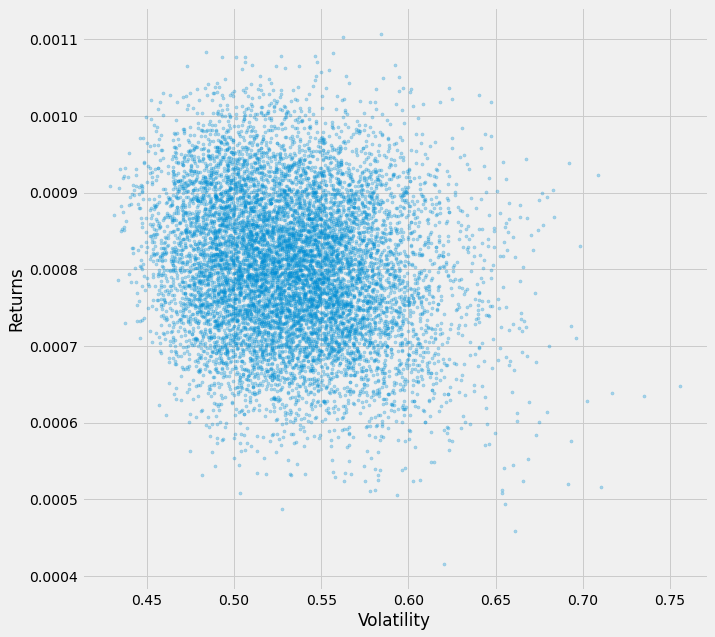

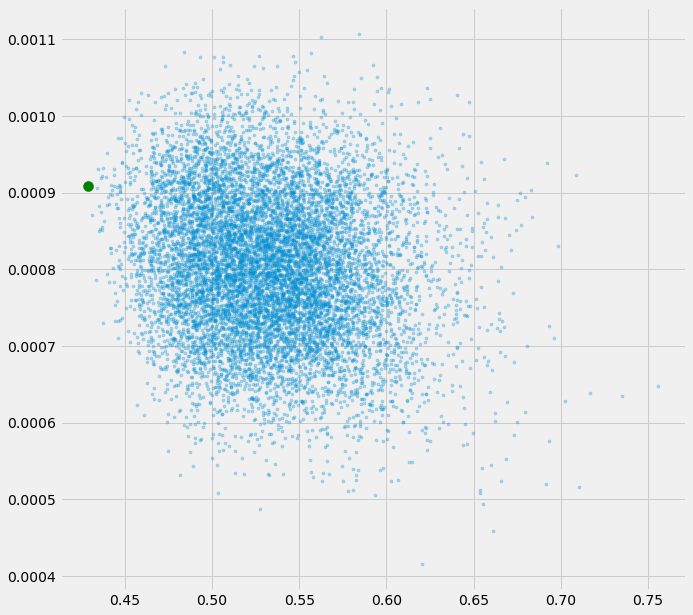

In [104]:
for counter, symbol in enumerate(sp500.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]
    
portfolios  = pd.DataFrame(data)
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
print(min_vol_port)
                               
# plot of the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='g', marker='o', s=100)

In [101]:
#part (c)
z=np.random.uniform(0,1,10)
w=z/z.sum() #set random potrfolio weights
port_var = cov.mul(w, axis=0).mul(w, axis=1).sum().sum()#portfolio VAR

ind_er = sp500.resample('D').last().pct_change().mean() #individual expected return
port_er = (weights*ind_er).sum() #portfolio expected return
ann_sd = sp500.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(500)) #two-year standart deviation
assets = pd.concat([ind_er, ann_sd], axis=1) #return and volatility table
assets.columns = ['Returns', 'Volatility']
print(assets)


p_ret = [] 
p_vol = [] 
p_weights = [] 

num_assets = len(sp500.columns)
num_portfolios = 10000

for portfolio in range(num_portfolios):
    z=np.random.uniform(0,1,10)
    weights=z/z.sum()
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) #scalar product
    p_ret.append(returns)
    var = cov.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# variance of portfolio
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(500) #Two-year std
    p_vol.append(ann_sd)

data = {'Returns':p_ret, 'Volatility':p_vol}

          Returns  Volatility
Symbols                      
HFC     -0.000353    0.851556
LVS      0.000464    0.652954
FBHS     0.001460    0.628825
PKG      0.000930    0.507537
SPGI     0.001063    0.508398
NWSA     0.000862    0.540105
V        0.000773    0.462873
LB       0.001430    1.056654
APA      0.000560    1.430058
TFX      0.000829    0.508661


Returns        0.000907
Volatility     0.427578
HFC weight     0.005611
LVS weight     0.033920
FBHS weight    0.013074
PKG weight     0.136682
SPGI weight    0.267250
NWSA weight    0.230111
V weight       0.024708
LB weight      0.019327
APA weight     0.018489
TFX weight     0.250828
Name: 3004, dtype: float64


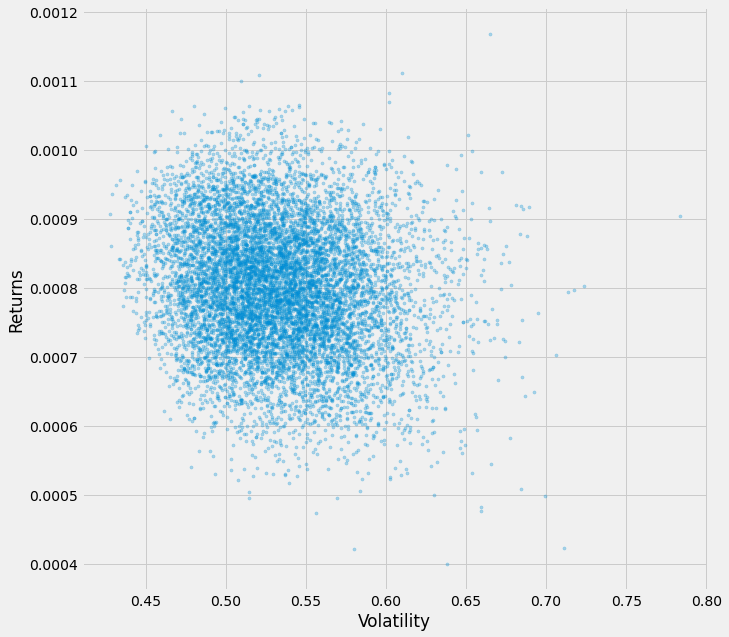

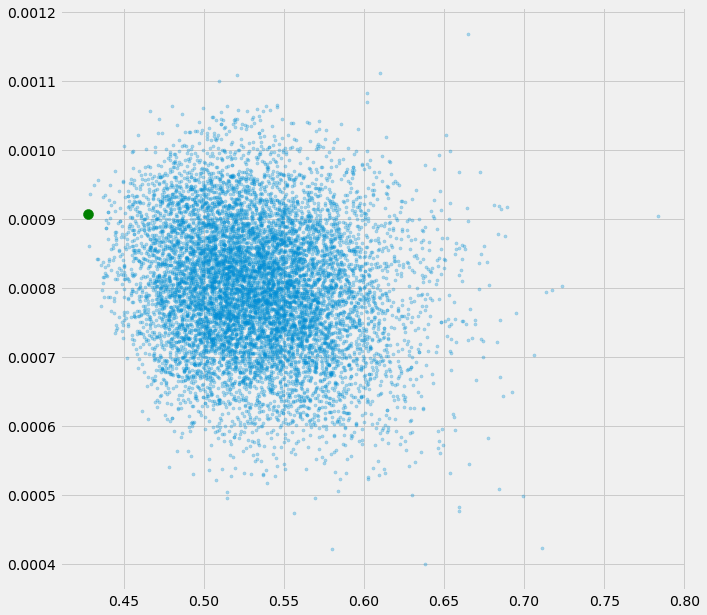

In [102]:
for counter, symbol in enumerate(sp500.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]
    
portfolios  = pd.DataFrame(data)
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
print(min_vol_port)
                               
# plot of the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='g', marker='o', s=100)